# Time Series Analysis
Data: Air Passengers Year: 1949-1960

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df.shape

(144, 2)

In [5]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [6]:
df.columns = ['month', 'passengers']

In [7]:
df.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df['month'] = pd.to_datetime(df['month'])

<AxesSubplot:>

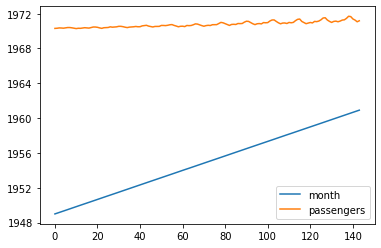

In [9]:
df.plot()

In [10]:
df.set_index('month', inplace = True)

In [11]:
df.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='month'>

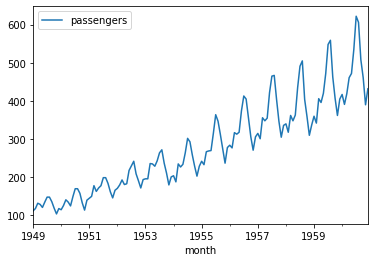

In [12]:
df.plot()

**The Graph shows the upward trend**.
**Seasonality can also be observed**.

In [13]:
s = pd.read_csv('data/AirPassengers.csv', parse_dates = True, index_col = [0], squeeze = True)
s

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

## Stationarity Test: Augmented Dickey Fuller Test
**Null Hypothesis H0**: Series is stationary <br>
**Alternate Hypothesis H1**: Not Stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def test_stationarity(passengers):
    
    #Determing rolling statistics
    rolmean = passengers.rolling(window = 12,center = False).mean() 
    rolstd = passengers.rolling(window = 12,center = False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(passengers, color = 'blue',label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(passengers)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

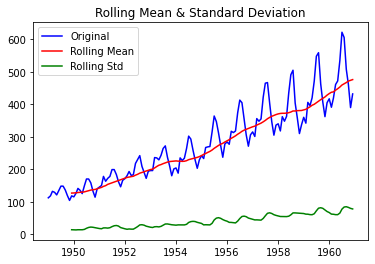

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
test_stationarity(s)

**Since the confidence value is > 0.05, we have strong evidence against our Null Hypothesis.** <br>
**The Data is not stationary**

## Check for Trend, Seasonality and noise

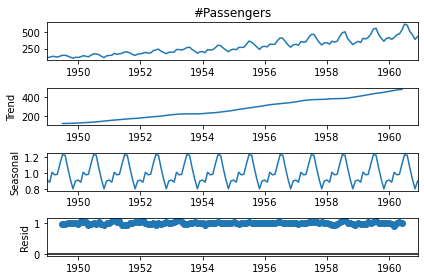

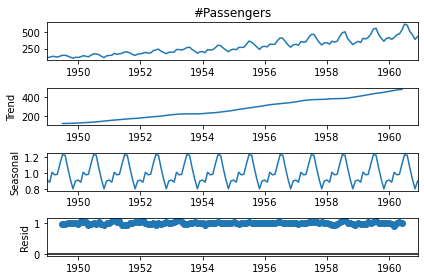

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(s, model = 'multiplicative')
sd.plot()

## Removing Trend and seasonality

### 1. Log Transformation

In [17]:
log_trans_series = np.log(s)
log_trans_series

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

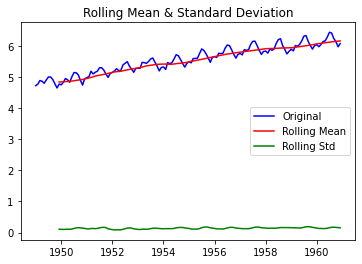

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
test_stationarity(log_trans_series)

### 2. Differences

In [19]:
s.diff()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64

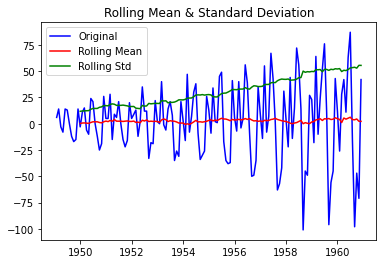

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
test_stationarity(s.diff().dropna())

### 3. Differences in Log Transformed Series

In [21]:
log_trans_series.diff()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 144, dtype: float64

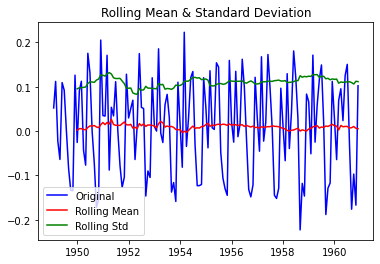

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [22]:
test_stationarity(log_trans_series.diff().dropna())

### 4. Substracting moving average from log transformation

In [23]:
movingAvg = log_trans_series.rolling(window = 12).mean()
ma_log_trans_series = log_trans_series - movingAvg
ma_log_trans_series

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64

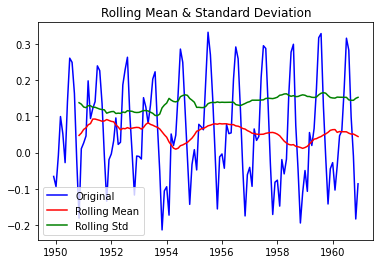

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
test_stationarity(ma_log_trans_series.dropna())

**Since P value is quiet low here, we can reject the null hypothesis and say the series is not stationary.** <br>
**We have removed trend also.**

### 5. Shiftting the log transformation

In [25]:
log_trans_series.shift()

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: #Passengers, Length: 144, dtype: float64

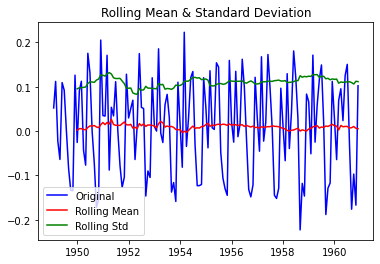

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
shift_diff = log_trans_series - log_trans_series.shift()
test_stationarity(shift_diff.dropna())

## AutoCorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

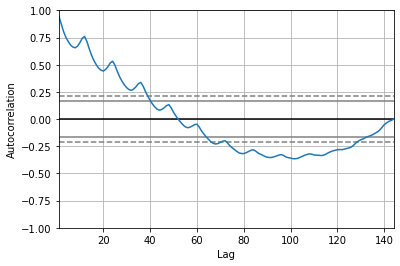

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(s)

**We can see trend in the data. As the correlations are decreasing with lag**

## Analyse ACF and PACF plots. 

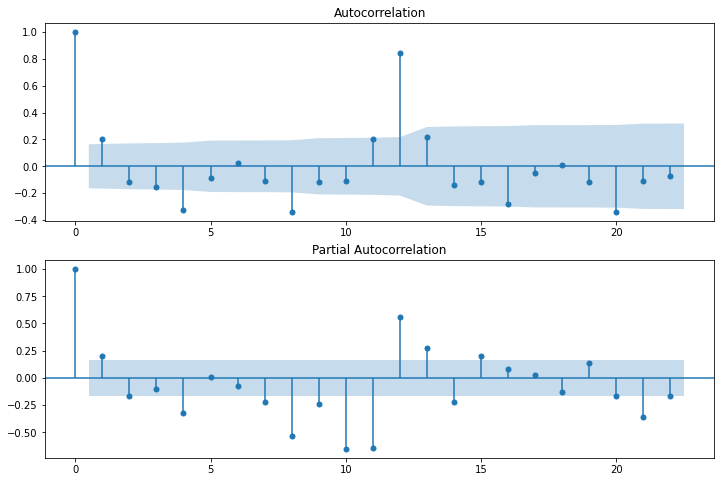

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(log_trans_series.diff().dropna(),lags = None, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(log_trans_series.diff().dropna(),lags = None, ax=ax2)

**Selecting p = 1, q = 1 and d = 1**

Not Stationary - ARIMA <br>
Stationary - ARIMA

## Using ARIMA model
Thus we are using non stationary data. Log transformed series. <br>
P = 0.07

/home/apeksha/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/apeksha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

Plotting ARIMA model
                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.804
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 24 Sep 2020   AIC                           -241.608
Time:                        18:34:52   BIC                           -229.756
Sample:                    02-01-1949   HQIC                          -236.792
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0098      0.010      0.993      0.321      -0.010       0.029
ar.L1.D.#Passengers    -0.5826      0.128     -4.536      0.000      -0.834      -0

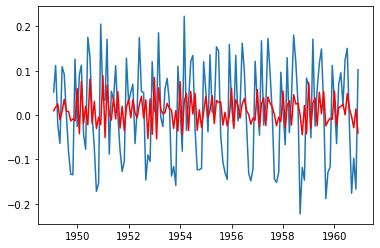

In [29]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(log_trans_series, order = (1,1,1))

results_ARIMA = model.fit(disp = -1)

plt.plot(log_trans_series.diff().dropna())
plt.plot(results_ARIMA.fittedvalues, color='red')
print('Plotting ARIMA model')
print(results_ARIMA.summary())

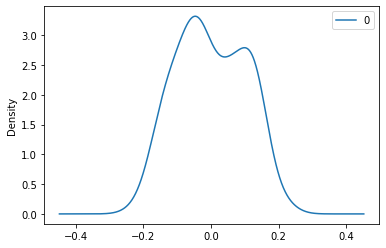

In [30]:
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind = 'kde')
plt.show()

/home/apeksha/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/apeksha/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

Plotting ARIMA model
                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 24 Sep 2020   AIC                           -287.281
Time:                        18:34:53   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.#Passengers     1.6293      0.039     41.868      0.000       1.553       1

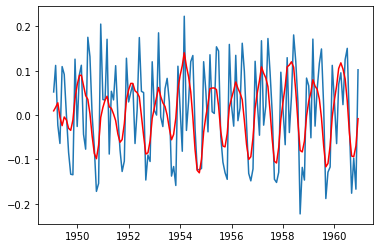

In [31]:
model = ARIMA(log_trans_series, order = (2,1,2))

results_ARIMA = model.fit(disp = -1)

plt.plot(log_trans_series.diff().dropna())
plt.plot(results_ARIMA.fittedvalues, color='red')
print('Plotting ARIMA model')
print(results_ARIMA.summary())

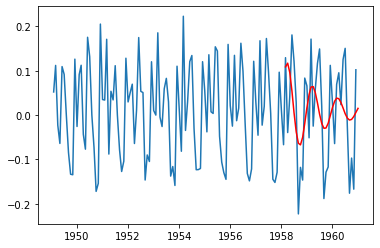

In [32]:
predicted = results_ARIMA.predict(start = 110, end = 144 , dynamic = True)
plt.plot(log_trans_series.diff().dropna())
plt.plot(predicted, color = 'red')

## Forecasting 
Reverting the difference and log transformation

In [33]:
pred = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [34]:
pred_sum = pred.cumsum()
print(pred_sum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108140
Length: 143, dtype: float64


In [35]:
pred_log = pd.Series(log_trans_series.iloc[0], index = log_trans_series.index)
pred_log = pred_log.add(pred_sum, fill_value=0)
pred_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

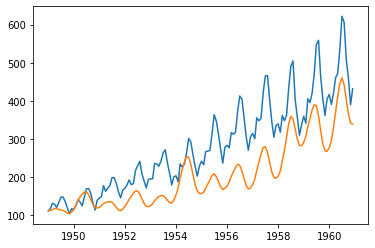

In [36]:
final_pred = np.exp(pred_log)
plt.plot(s)
plt.plot(final_pred)